In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
def plot_correlation_matrix(tickers, start_date, end_date):
    # Set Seaborn style
    sns.set(style="whitegrid", palette="pastel")

    # Download stock data from Yahoo Finance
    stock_data = {}
    for company, ticker in tickers.items():
        try:
            stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
            stock_data[company].reset_index(inplace=True)  # Reset index
        except Exception as e:
            print(f"Error downloading data for {company}: {e}")
            continue

    # Calculate daily returns
    daily_returns = {}
    for company, data in stock_data.items():
        if not data.empty:
            data['Daily Return'] = data['Close'].pct_change()
            daily_returns[company] = data['Daily Return']

    # Create a DataFrame of daily returns
    daily_returns_df = pd.DataFrame(daily_returns)

    # Calculate the correlation matrix
    correlation_matrix = daily_returns_df.corr()

    # Plot the heatmap with enhanced aesthetics
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0, annot_kws={"size": 10})
    plt.title(f'Matriz de correlación del rendimiento diario [{start_date} - {end_date}]', fontsize=20, fontweight='bold', color='black')
    plt.xlabel('', fontsize=14, fontweight='bold')
    plt.ylabel('', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.show()

    return correlation_matrix

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


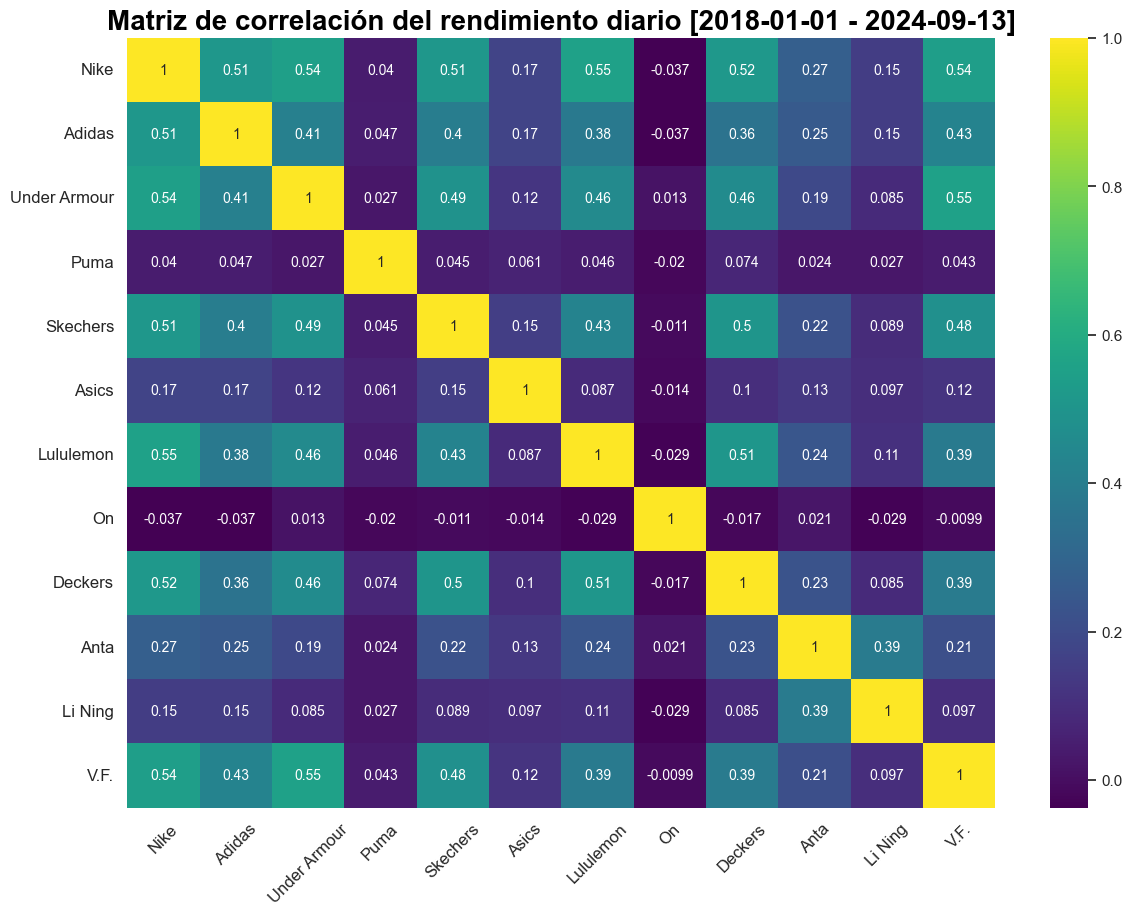

In [9]:
# Example usage
tickers = {
    'Nike': 'NKE',
    'Adidas': 'ADDYY',
    'Under Armour': 'UAA',
    'Puma': 'PUM.DE',
    'Skechers': 'SKX',
    'Asics': 'ASCCY',  # Placeholder, replace with correct ticker if available
    'Lululemon': 'LULU',
    'On': 'ONON',
    'Deckers': 'DECK',
    'Anta': 'ANPDY',  # Placeholder, replace with correct ticker if available
    'Li Ning': 'LNNGY',  # Placeholder, replace with correct ticker if available
    'V.F.': 'VFC'
}

start_date = "2018-01-01"
end_date = "2024-09-13"

correlation_matrix = plot_correlation_matrix(tickers, start_date, end_date)